In [1]:
from talus import morse
import scipy
import sklearn
import sklearn.datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = sklearn.datasets.load_iris(return_X_y=True)

In [3]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=3)

In [4]:
train_X.shape

(112, 4)

In [5]:
batch_size=4

In [6]:
def get_entropies(points, clf):
    morse_points = []
    predictions = clf.predict_proba(points)
    entropies = [scipy.stats.entropy(p) for p in predictions]
    return entropies

In [10]:
def maximum_persistence_selection(available_points, clf, batch_size):
    morse_smale = morse.MorseSmaleComplex(k=batch_size)
    entropies = get_entropies(available_points, clf)
    morse_result = morse_smale.fit_transform(available_points, entropies)
    
    persistences = [(morse_result.descending_complex.lifetimes[i], i)
                    for i in range(len(available_points))]
    
    return [x[1] for x in sorted(persistences)[-batch_size:]], entropies, morse_result

In [16]:
def plot_points(selected_indices, all_points, entropies, morse_smale):
    # TODO: project with UMAP
    xs = []
    ys = []
    assignments = []
    sizes = []
    for i, point in enumerate(all_points):
        xs.append(point[0])
        ys.append(point[1])
        assignments.append(morse_smale.descending_complex.assignments[i])
        sizes.append(100*int(i in selected_indices) + 50)
    plt.subplot(1, 2, 1)
    plt.scatter(xs, ys, c=entropies, s=sizes)
    plt.gca().set_title("Entropies")
    plt.subplot(1, 2, 2)
    plt.scatter(xs, ys, c=assignments, s=sizes)
    plt.gca().set_title("Descending Morse cells")
    plt.gcf().set_size_inches(12,5)

    plt.show()

Persistence accuracy: 0.7368421052631579


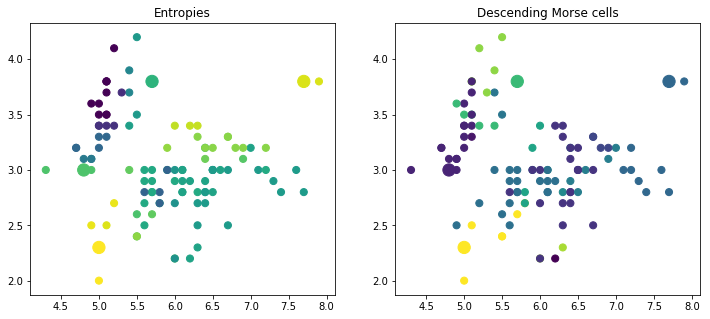

Persistence accuracy: 0.9210526315789473


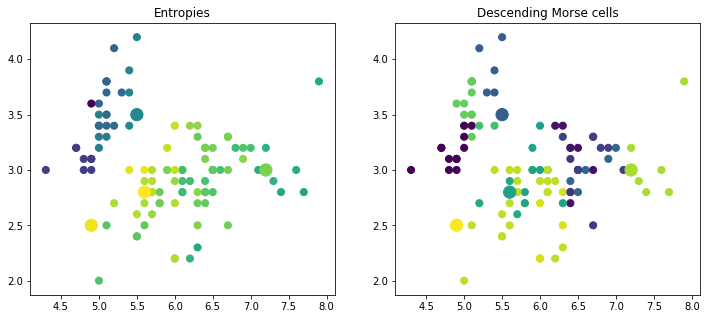

Persistence accuracy: 0.9210526315789473


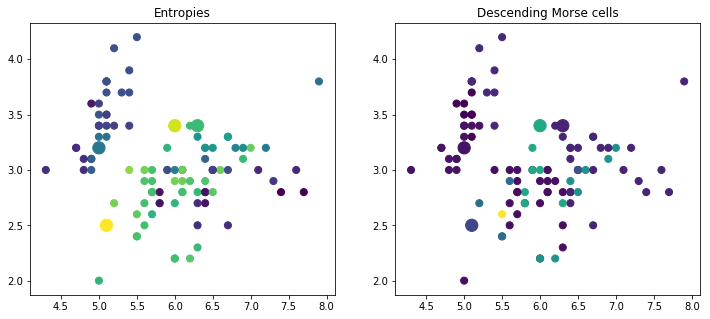

Persistence accuracy: 0.9210526315789473


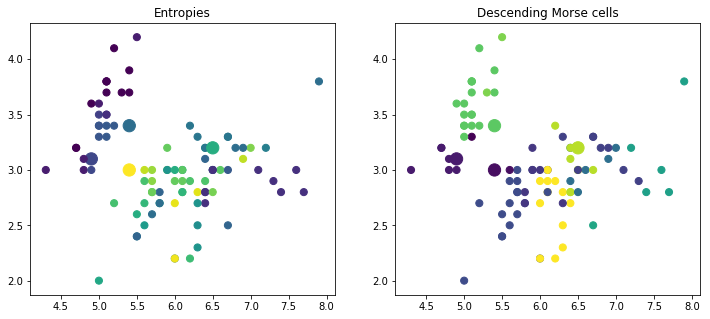

Persistence accuracy: 0.9473684210526315


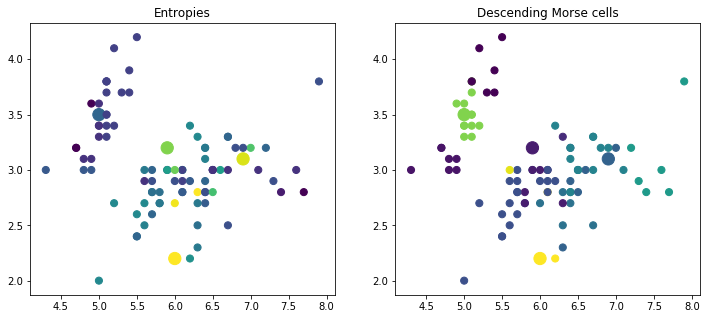

In [18]:
selected_indices = list(np.random.choice(range(train_X.shape[0]), size=batch_size,
                                         replace=False))
remaining_indices = [i for i in range(len(train_X)) if i not in selected_indices]
index_to_point = dict(enumerate(train_X))
clf = RandomForestClassifier(n_estimators=100)
#while len(remaining_indices) > 0:
for i in range(5):
    clf.fit(train_X[selected_indices], train_y[selected_indices])
    predictions = clf.predict(test_X)
    persistence_accuracy = sklearn.metrics.accuracy_score(test_y, predictions)
    
    print(f"Persistence accuracy: {persistence_accuracy}")

    current_X = [index_to_point[i] for i in remaining_indices]
    next_points, entropies, morse_smale = maximum_persistence_selection(current_X,
                                                             clf, batch_size)
    
    plot_points(next_points, current_X, entropies, morse_smale)
    selected_indices.extend([remaining_indices[i] for i in next_points])
    remaining_indices = [i for i in range(len(train_X)) if i not in selected_indices]

In [18]:
!maturin develop --release

🍹 Building a mixed python/rust project
🔗 Found rust-cpython bindings
🐍 Found CPython 3.7m at python
    Finished release [optimized] target(s) in 0.09s
